## Introduction
In this notebook you will download and preprocess the data for the liver and liver tumor segmentation:<br />
The data is provided by the medical segmentation decathlon (http://medicaldecathlon.com/)<br /> (Data License: https://creativecommons.org/licenses/by-sa/4.0/)<br />

You can directly download the original cardiac MRIs and segmentation maps from: <br />
https://drive.google.com/file/d/1wEB2I6S6tQBVEPxir8cA5kFB8gTQadYY/view?usp=sharing

As this dataset has over 26GB we provide a resampled version of it. The new scans are of shape (256x256xZ), where Z is varying and reduce the size of the dataset to 2.5GB

It is directly included in this directory


In [1]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from natsort import natsorted
from IPython.display import HTML

## Inspection:
Let's inspect some sample data

We do not need to preprocess this dataset as the necessary steps are directly performed by torchio during training

In [2]:
root = Path("Task03_Liver_rs/imagesTr/")
label = Path("Task03_Liver_rs/labelsTr/")

We start with a helper function which automatically replaces "imagesTr" with "labelsTr" in the filepaths so that we can easily switch between CT images and label masks

In [3]:
def change_img_to_label_path(path):
    """
    Replaces imagesTr with labelsTr
    """
    parts = list(path.parts)  # get all directories within the path
    parts[parts.index("imagesTr")] = "labelsTr"  # Replace imagesTr with labelsTr
    return Path(*parts)  # Combine list back into a Path object


In [11]:
sample_path = list(root.glob("liver*"))# Choose a subject
sorted_paths = natsorted(sample_path)
sample_path = sorted_paths[4]
for path in sorted_paths:
    print(path)
sample_path_label = change_img_to_label_path(sample_path)

Task03_Liver_rs\imagesTr\liver_0.nii.gz
Task03_Liver_rs\imagesTr\liver_1.nii.gz
Task03_Liver_rs\imagesTr\liver_2.nii.gz
Task03_Liver_rs\imagesTr\liver_3.nii.gz
Task03_Liver_rs\imagesTr\liver_4.nii.gz
Task03_Liver_rs\imagesTr\liver_5.nii.gz
Task03_Liver_rs\imagesTr\liver_6.nii.gz
Task03_Liver_rs\imagesTr\liver_7.nii.gz
Task03_Liver_rs\imagesTr\liver_8.nii.gz
Task03_Liver_rs\imagesTr\liver_9.nii.gz
Task03_Liver_rs\imagesTr\liver_10.nii.gz
Task03_Liver_rs\imagesTr\liver_11.nii.gz
Task03_Liver_rs\imagesTr\liver_12.nii.gz
Task03_Liver_rs\imagesTr\liver_13.nii.gz
Task03_Liver_rs\imagesTr\liver_14.nii.gz
Task03_Liver_rs\imagesTr\liver_15.nii.gz
Task03_Liver_rs\imagesTr\liver_16.nii.gz
Task03_Liver_rs\imagesTr\liver_17.nii.gz
Task03_Liver_rs\imagesTr\liver_18.nii.gz
Task03_Liver_rs\imagesTr\liver_19.nii.gz
Task03_Liver_rs\imagesTr\liver_20.nii.gz
Task03_Liver_rs\imagesTr\liver_21.nii.gz
Task03_Liver_rs\imagesTr\liver_22.nii.gz
Task03_Liver_rs\imagesTr\liver_23.nii.gz
Task03_Liver_rs\imagesTr\l

Load NIfTI and extract image data

In [12]:
for path in sorted_paths: 
    data = nib.load(path)
    label = nib.load(change_img_to_label_path(path))

    ct = data.get_fdata()
    mask = label.get_fdata().astype(int)  # Class labels should not be handled as float64
    print(ct.shape)

(180, 180, 125)
(173, 173, 205)
(199, 199, 173)
(178, 178, 178)
(232, 232, 225)
(248, 248, 144)
(224, 224, 173)
(192, 192, 181)
(217, 217, 181)
(210, 210, 183)
(197, 197, 167)
(172, 172, 156)
(168, 168, 152)
(217, 217, 202)
(176, 176, 196)
(168, 168, 189)
(180, 180, 184)
(191, 191, 221)
(236, 236, 226)
(193, 193, 146)
(206, 206, 154)
(197, 197, 146)
(250, 250, 270)
(169, 169, 157)
(172, 172, 138)
(197, 197, 141)
(221, 221, 156)
(189, 189, 201)
(256, 256, 43)
(256, 256, 58)
(256, 256, 67)
(256, 256, 31)
(256, 256, 47)
(256, 256, 45)
(256, 256, 51)
(256, 256, 42)
(256, 256, 37)
(256, 256, 41)
(256, 256, 44)
(256, 256, 87)
(256, 256, 41)
(256, 256, 38)
(256, 256, 42)
(256, 256, 52)
(256, 256, 40)
(256, 256, 25)
(256, 256, 42)
(256, 256, 75)
(250, 250, 204)
(245, 245, 212)
(232, 232, 200)
(231, 231, 227)
(215, 215, 198)
(218, 218, 140)
(212, 212, 160)
(171, 171, 160)
(206, 206, 160)
(180, 180, 153)
(176, 176, 142)
(176, 176, 144)
(205, 205, 163)
(194, 194, 161)
(165, 165, 126)
(190, 190, 1

In [13]:
print(nib.aff2axcodes(data.affine))
print(ct.shape)

('R', 'A', 'S')
(181, 181, 79)


<IPython.core.display.Javascript object>


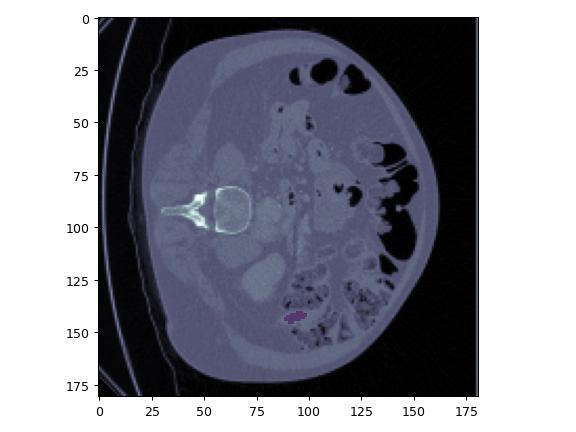

In [14]:
fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(ct.shape[2]):  # Axial view
    plt.imshow(ct[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    plt.imshow(mask_, alpha=0.5)
    # plt.axis("off")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation


